In [41]:
import my_func
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [9]:
reload(my_func)

<module 'my_func' from 'my_func.py'>

In [10]:
hands_features = []
id_ = []
for i in range(1, 158):
    cnt = 2 - int(np.log10(i))
    try:
        image = plt.imread('training/' + '0' * cnt + str(i) + '.tif')
    except:
        continue
    id_.append(i)
    bin_image = my_func.binary_image(image)
    bin_image = (bin_image * 255).astype('uint8')
    all_defects = my_func.preproc(image, bin_image)
    is_tip_valley = my_func.filtering(image, bin_image, all_defects)
    im, hand_feature = my_func.features(image, is_tip_valley, all_defects)
    hands_features.append(hand_feature)
    plt.imsave("t_v/tip_valley" + str(i) + '.png', im)
id_ = np.array(id_)
X = np.array(hands_features)

In [11]:
neighbor = id_[np.argsort(cdist(X, X), axis=1)[:, 1: 4]]

In [73]:
column = ['Имя образца', 'Имена ближайших соседей', 
          'Имя образца', 'Имена ближайших соседей', 
          'Имя образца', 'Имена ближайших соседей']
neighbor_table = pd.DataFrame(columns=column)
for i in range(neighbor.shape[0] // 3):
    row = []
    for j in range(3):
        col_ = ''
        cnt = 2 - int(np.log10(id_[i + j * 33]))
        row.append('0' * cnt + str(id_[i + j * 33]))
        for k in range(3):
            cnt = 2 - int(np.log10(neighbor[i + j * 33][k]))
            col_ += cnt * '0' + str(neighbor[i + j * 33][k]) + ' '
        row.append(col_)
    neighbor_table = neighbor_table.append(pd.Series(
                row,
                index=neighbor_table.columns),
                ignore_index=True)

In [74]:
neighbor_table

,Имя образца,Имена ближайших соседей,Имя образца,Имена ближайших соседей,Имя образца,Имена ближайших соседей
0,001,002 037 090,039,037 002 001,095,109 008 067
1,002,001 037 145,041,060 105 049,096,063 093 031
2,003,006 007 005,046,020 018 016,097,007 003 014
3,004,006 003 007,047,050 060 146,099,012 014 003
4,005,007 003 006,049,047 060 041,105,142 107 106
5,006,003 004 007,050,047 060 146,106,142 105 107
6,007,005 003 155,051,052 054 053,107,105 088 091
7,008,067 066 057,052,051 054 053,109,092 067 113
8,009,011 010 065,053,054 052 051,111,096 031 063
9,010,009 011 065,054,051 052 078,112,114 113 092


In [31]:
quality = []
n_clusters = np.arange(10, 60)
for i in range(10, 60):
    clf = KMeans(n_clusters=i)
    clf.fit(X)
    quality.append(-1 * clf.score(X))

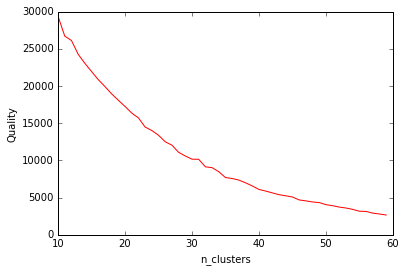

In [54]:
plt.plot(n_clusters, quality, 'r')
plt.xlabel('n_clusters')
plt.ylabel('Quality')

In [67]:
clf = KMeans(n_clusters=33)
clf.fit(X)
labels = clf.labels_

In [68]:
humans = []
for i in range(np.unique(labels).shape[0]):
    humans.append(id_[np.where(labels == i)[0]])

In [69]:
humans

[array([12, 13, 14, 15, 97]),
 array([ 26,  28, 122]),
 array([150, 151, 152]),
 array([51, 52, 53, 54]),
 array([ 66, 128, 129]),
 array([ 92, 112, 113, 114]),
 array([49]),
 array([  9,  10,  65, 141]),
 array([144, 145, 146]),
 array([16, 17, 20, 46, 68]),
 array([ 1,  2, 37, 39]),
 array([111]),
 array([  8,  67, 109]),
 array([31, 63, 96]),
 array([105, 106, 107, 142]),
 array([27, 29]),
 array([138]),
 array([22, 23, 35, 36]),
 array([126, 127]),
 array([11, 56, 57, 76, 77, 79, 81, 86]),
 array([71]),
 array([  3,   4,   5,   6,   7,  99, 155, 157]),
 array([47, 50, 60]),
 array([64]),
 array([118, 123]),
 array([ 34, 120, 124]),
 array([95]),
 array([135]),
 array([55, 82, 90]),
 array([41]),
 array([88, 91]),
 array([93]),
 array([18, 19, 21, 24, 78])]

In [86]:
column = ['Человек', 'Изображения ладоней']
cluster_table = pd.DataFrame(columns=column)
for i in range(len(humans)):
    row = [str(i + 1)]
    col_ = ''
    for j in range(humans[i].shape[0]):
        cnt = 2 - int(np.log10(humans[i][j]))
        col_ += ('0' * cnt + str(humans[i][j])) + ' '
    row.append(col_)
    cluster_table = cluster_table.append(pd.Series(
                row,
                index=cluster_table.columns),
                ignore_index=True)

In [89]:
print cluster_table.to_latex()

\begin{tabular}{lll}
\toprule
{} & Человек &               Изображения ладоней \\
\midrule
0  &       1 &              012 013 014 015 097  \\
1  &       2 &                      026 028 122  \\
2  &       3 &                      150 151 152  \\
3  &       4 &                  051 052 053 054  \\
4  &       5 &                      066 128 129  \\
5  &       6 &                  092 112 113 114  \\
6  &       7 &                              049  \\
7  &       8 &                  009 010 065 141  \\
8  &       9 &                      144 145 146  \\
9  &      10 &              016 017 020 046 068  \\
10 &      11 &                  001 002 037 039  \\
11 &      12 &                              111  \\
12 &      13 &                      008 067 109  \\
13 &      14 &                      031 063 096  \\
14 &      15 &                  105 106 107 142  \\
15 &      16 &                          027 029  \\
16 &      17 &                              138  \\
17 &      18 &           

In [90]:
reload(my_func)

<module 'my_func' from 'my_func.py'>

In [92]:
for i in range(12, 14):
    cnt = 2 - int(np.log10(i))
    try:
        image = plt.imread('training/' + '0' * cnt + str(i) + '.tif')
    except:
        continue
    bin_image = my_func.binary_image(image)
    bin_image = (bin_image * 255).astype('uint8')
    plt.imsave("bad_binary" + str(i) + '.png', bin_image, cmap='gray')